In [1]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from data_utils import load_daily_crsp_file
from indicators import add_indicators
from datetime import date

sns.set_theme()
plt.rcParams["figure.dpi"] = 300

In [8]:
df = load_daily_crsp_file(date(2023, 1, 1))

Loading crsp daily data: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


In [9]:
res = add_indicators(df)

In [14]:
res.head()

permno,permco,date,ncusip,ticker,shrcd,exchcd,siccd,prc,ret,retx,vol,shrout,cfacshr,rsi_6,macd_6,ppo_6,roc_6,cmo_6,sma_6,ema_6,wma_6,tema_6,rsi_7,macd_7,ppo_7,roc_7,cmo_7,sma_7,ema_7,wma_7,tema_7,rsi_8,macd_8,ppo_8,roc_8,cmo_8,…,tema_23,rsi_24,macd_24,ppo_24,roc_24,cmo_24,sma_24,ema_24,wma_24,tema_24,rsi_25,macd_25,ppo_25,roc_25,cmo_25,sma_25,ema_25,wma_25,tema_25,rsi_26,macd_26,ppo_26,roc_26,cmo_26,sma_26,ema_26,wma_26,tema_26,rsi_27,macd_27,ppo_27,roc_27,cmo_27,sma_27,ema_27,wma_27,tema_27
i64,i64,date,str,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
10026,7976,2023-12-13,"""46603210""","""JJSF""",11,3,2052,173.17999,0.008502,0.008502,135319.0,19342.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10026,7976,2023-04-28,"""46603210""","""JJSF""",11,3,2052,153.2,0.001046,0.001046,114493.0,19252.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10026,7976,2023-01-13,"""46603210""","""JJSF""",11,3,2052,154.49001,0.013515,0.013515,50967.0,19229.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10026,7976,2024-10-10,"""46603210""","""JJSF""",11,3,2052,165.55,-0.007256,-0.007256,57268.0,19460.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10026,7976,2023-03-23,"""46603210""","""JJSF""",11,3,2052,144.5,0.004519,0.004519,86749.0,19229.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,…,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
res.filter(pl.col('permco'))

InvalidOperationError: filter predicate must be of type `Boolean`, got `Int64`

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'filter' failed <---
FILTER col("permco") FROM
  DF ["permno", "permco", "date", "ncusip"]; PROJECT */212 COLUMNS

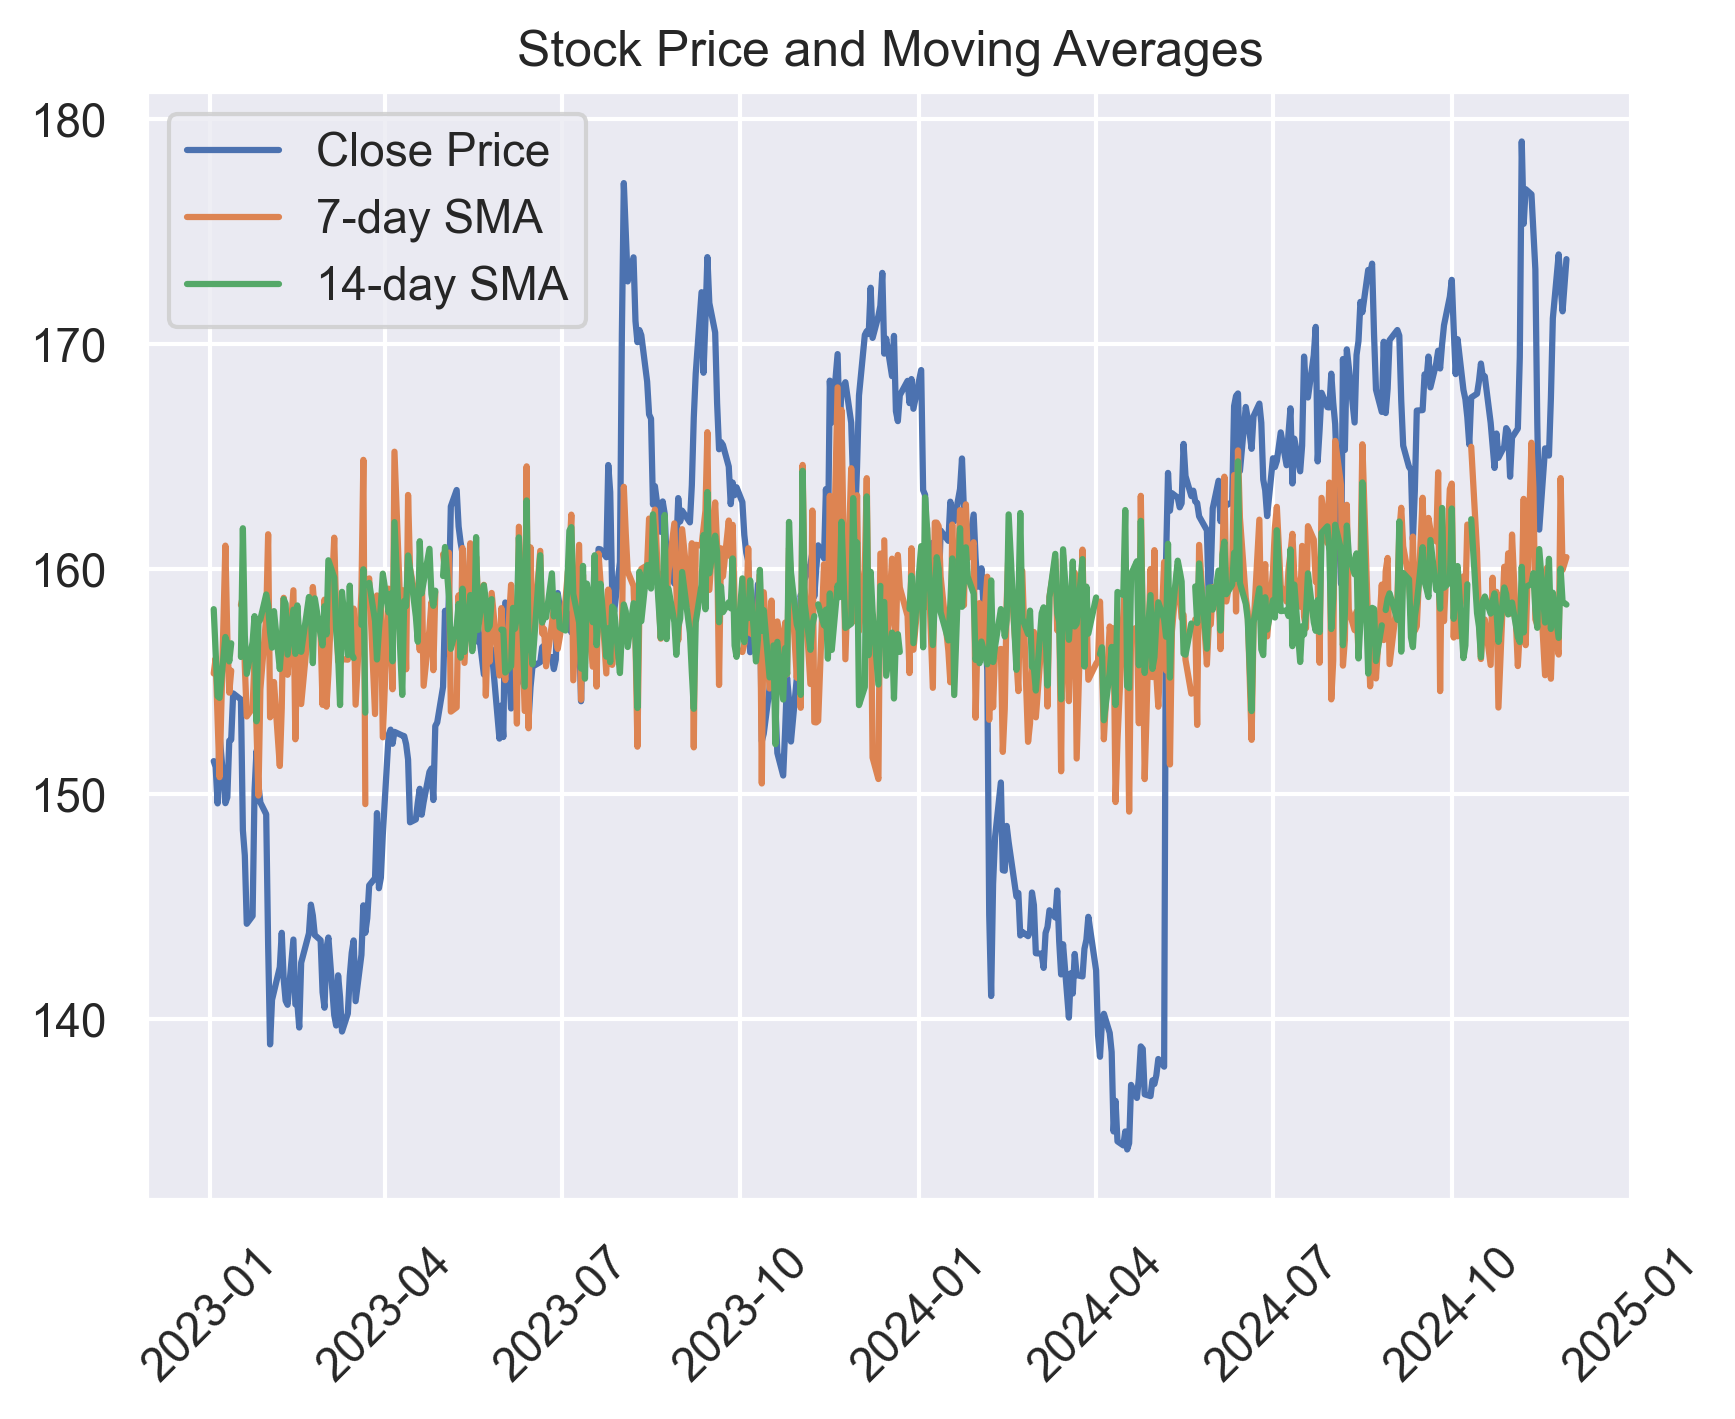

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

# Filter and sort by date
filtered = (
    res.filter(pl.col("permco") == 7976)
    .select(["date", "prc", "sma_7", "sma_14"])
    .sort("date")
)

# Plot
plt.plot(filtered["date"], filtered["prc"], label="Close Price")
plt.plot(filtered["date"], filtered["sma_7"], label="7-day SMA")
plt.plot(filtered["date"], filtered["sma_14"], label="14-day SMA")
plt.legend()
plt.title("Stock Price and Moving Averages")
plt.xticks(rotation=45)
plt.show()
